In [33]:
import pandas as pd
import numpy as np
import seaborn as sys
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [34]:
data = pd.read_csv("DataSets/Salary_Data_Based_country_and_race.csv")

data = data.dropna(how="any",axis=0)

del data["Unnamed: 0"]

data = pd.DataFrame(data,columns=["Age","Gender","Education Level","Job Title","Years of Experience","Country","Race","Salary"])



C:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


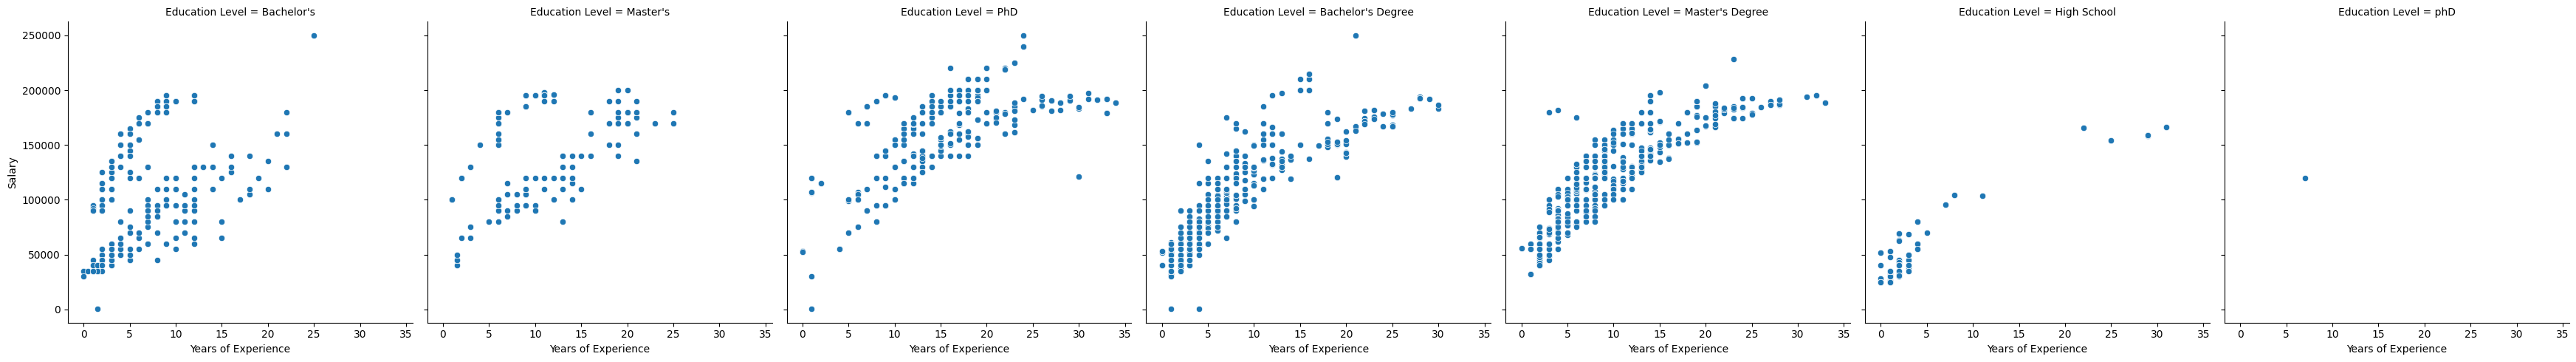

In [35]:
sys.relplot(x="Years of Experience",col="Education Level",y="Salary",data=data)

plt.show()


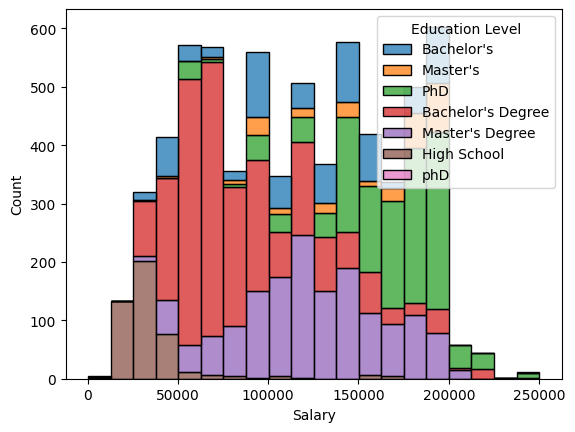

In [36]:
sys.histplot(x="Salary",multiple="stack",data=data,hue="Education Level",bins=20)


plt.show()

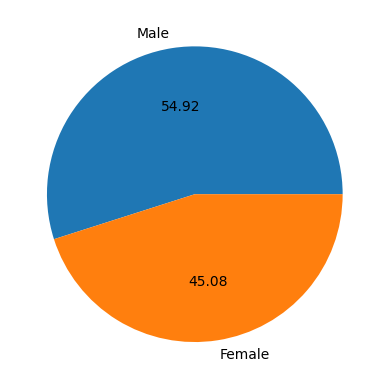

In [37]:
plt.pie(data["Gender"].value_counts()[:2],labels=data["Gender"].value_counts()[:2].index,autopct="%.2f")
plt.show()

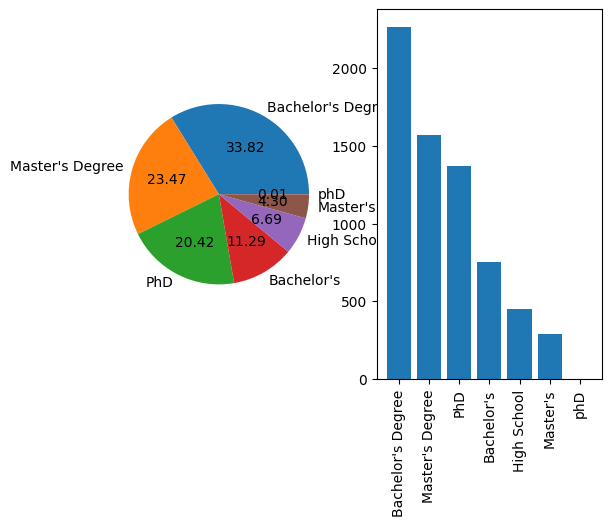

In [38]:
plt.subplot(1,2,1)

plt.pie(data["Education Level"].value_counts(),labels=data["Education Level"].value_counts().index,autopct="%.2f")

plt.subplot(1,2,2)

plt.bar(data["Education Level"].value_counts().index,data["Education Level"].value_counts())

plt.xticks(rotation="vertical")

plt.show()

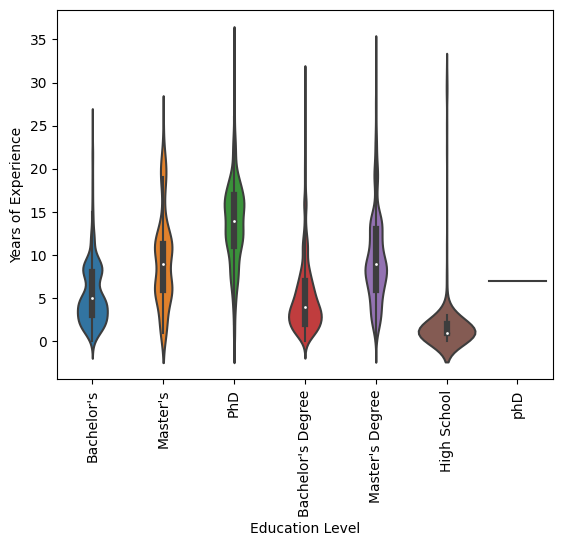

In [39]:
sys.violinplot(y="Years of Experience",x="Education Level",data=data)

plt.xticks(rotation="vertical")


plt.show()

<Axes: ylabel='count'>

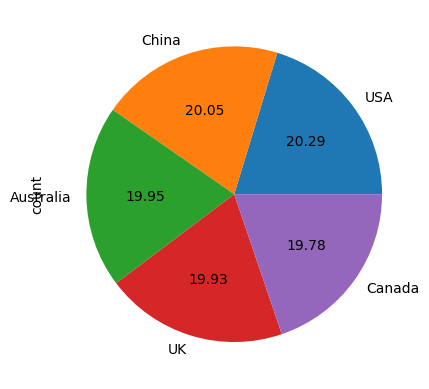

In [40]:
data["Country"].value_counts().plot(kind="pie",autopct="%.2f")

<Axes: xlabel='Race'>

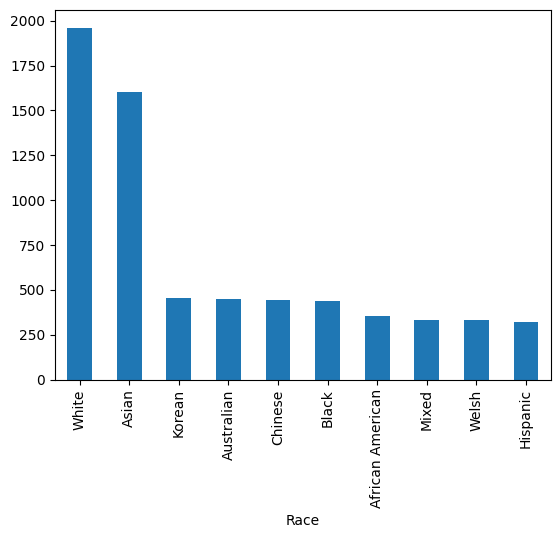

In [41]:
data["Race"].value_counts().plot(kind="bar")

<Axes: xlabel='Years of Experience', ylabel='Salary'>

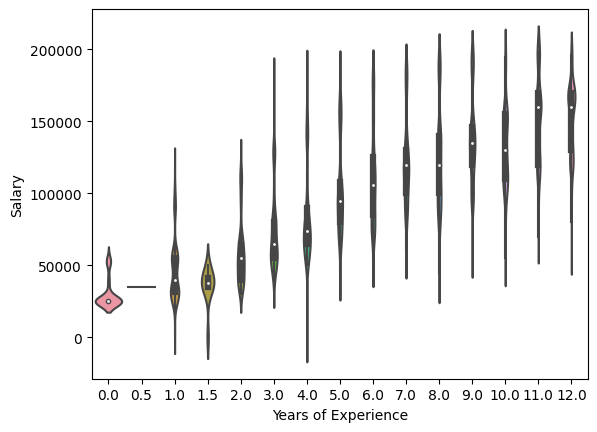

In [42]:
sys.violinplot(y="Salary",x="Years of Experience",data=data[data["Years of Experience"]<=12])

<Axes: xlabel='Years of Experience', ylabel='Salary'>

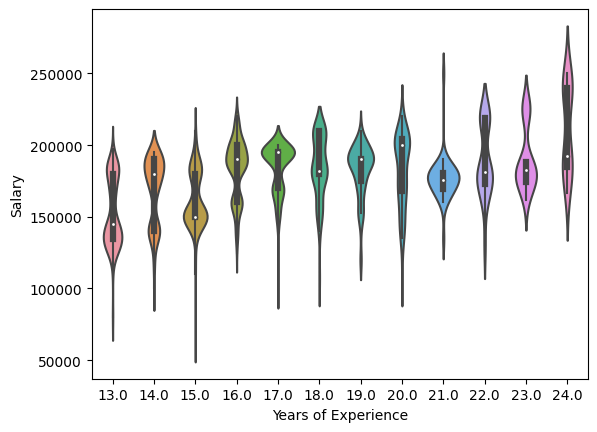

In [43]:
sys.violinplot(y="Salary",x="Years of Experience",data=data[(data["Years of Experience"]>12)&(data["Years of Experience"]<=24)])


<Axes: xlabel='Years of Experience', ylabel='Salary'>

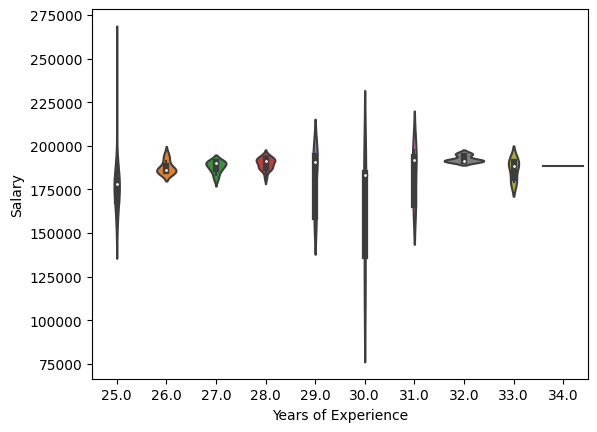

In [44]:
sys.violinplot(y="Salary",x="Years of Experience",data=data[data["Years of Experience"]>24])


C:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


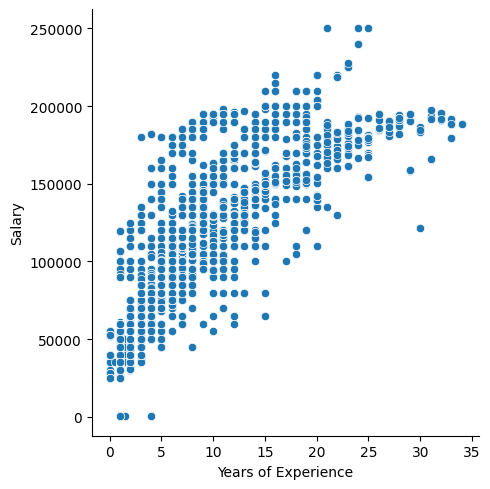

In [45]:
sys.relplot(x="Years of Experience",y="Salary",data=data)
plt.show()

In [55]:
for i in ["Years of Experience","Salary"]:
    data[i] = StandardScaler().fit_transform(data[[i]].to_numpy())
    
    
X = data["Years of Experience"]

X = np.array(X).reshape(-1,1)

y = data["Salary"]

Xtrain ,Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.2)

model = LinearRegression()

model.fit(Xtrain,Ytrain)

prediction =  model.predict(Xtest)

mean_absolute_error(Ytest,prediction),prediction

(0.47574584588576313,
 array([-0.27738788,  0.39556208,  0.53015207, ...,  0.12638209,
        -0.95033784,  0.12638209]))